# NIFTY 50 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'NSEI'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-28 00:00:00+05:30,25030.800781,25129.599609,24964.650391,25052.349609,220400,0.0,0.0
2024-08-29 00:00:00+05:30,25035.300781,25192.900391,24998.500000,25151.949219,354000,0.0,0.0
2024-08-30 00:00:00+05:30,25249.699219,25268.349609,25199.400391,25235.900391,638200,0.0,0.0
2024-09-02 00:00:00+05:30,25333.599609,25333.650391,25235.500000,25278.699219,222800,0.0,0.0
2024-09-03 00:00:00+05:30,25313.400391,25321.699219,25235.800781,25279.849609,212100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-21 00:00:00+05:30,22857.199219,22921.000000,22720.300781,22795.900391,242800,0.0,0.0
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22518.800781,22553.349609,214300,0.0,0.0
2025-02-25 00:00:00+05:30,22516.449219,22625.300781,22513.900391,22547.550781,250300,0.0,0.0


In [2]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-28 00:00:00+05:30,17383.250000,17440.449219,17255.199219,17303.949219,420900,0.0,0.0
2023-03-01 00:00:00+05:30,17360.099609,17467.750000,17345.250000,17450.900391,272900,0.0,0.0
2023-03-02 00:00:00+05:30,17421.500000,17445.800781,17306.000000,17321.900391,310700,0.0,0.0
2023-03-03 00:00:00+05:30,17451.250000,17644.750000,17427.699219,17594.349609,356200,0.0,0.0
2023-03-06 00:00:00+05:30,17680.349609,17799.949219,17671.949219,17711.449219,362800,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-21 00:00:00+05:30,22857.199219,22921.000000,22720.300781,22795.900391,242800,0.0,0.0
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22518.800781,22553.349609,214300,0.0,0.0
2025-02-25 00:00:00+05:30,22516.449219,22625.300781,22513.900391,22547.550781,250300,0.0,0.0


## 日足チャートと Bollinger's bands

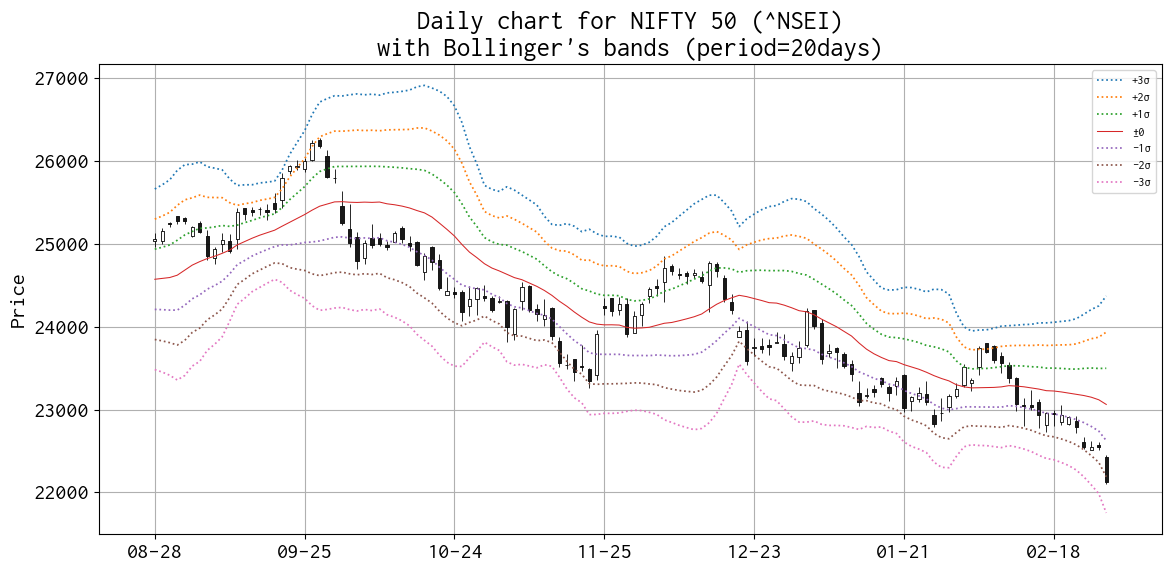

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

"""
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()
"""

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.grid()

try:
    ax.set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_%s.png' % code)
plt.show()

In [27]:
len(df)

128

In [28]:
df.tail(2)['Close']

Date
2025-02-25 00:00:00+05:30    22547.550781
2025-02-27 00:00:00+05:30    22545.050781
Name: Close, dtype: float64

In [29]:
df.tail(2)['Close'].diff()

Date
2025-02-25 00:00:00+05:30    NaN
2025-02-27 00:00:00+05:30   -2.5
Name: Close, dtype: float64

In [30]:
df['Close'].rolling(25).mean()

Date
2024-08-27 00:00:00+05:30             NaN
2024-08-28 00:00:00+05:30             NaN
2024-08-29 00:00:00+05:30             NaN
2024-08-30 00:00:00+05:30             NaN
2024-09-02 00:00:00+05:30             NaN
                                 ...     
2025-02-20 00:00:00+05:30    23196.118047
2025-02-21 00:00:00+05:30    23179.826094
2025-02-24 00:00:00+05:30    23148.170078
2025-02-25 00:00:00+05:30    23129.086094
2025-02-27 00:00:00+05:30    23104.674141
Name: Close, Length: 128, dtype: float64

In [31]:
df['Close'].rolling(75).mean()

Date
2024-08-27 00:00:00+05:30             NaN
2024-08-28 00:00:00+05:30             NaN
2024-08-29 00:00:00+05:30             NaN
2024-08-30 00:00:00+05:30             NaN
2024-09-02 00:00:00+05:30             NaN
                                 ...     
2025-02-20 00:00:00+05:30    23714.346094
2025-02-21 00:00:00+05:30    23695.447422
2025-02-24 00:00:00+05:30    23669.704740
2025-02-25 00:00:00+05:30    23647.680755
2025-02-27 00:00:00+05:30    23626.305443
Name: Close, Length: 128, dtype: float64

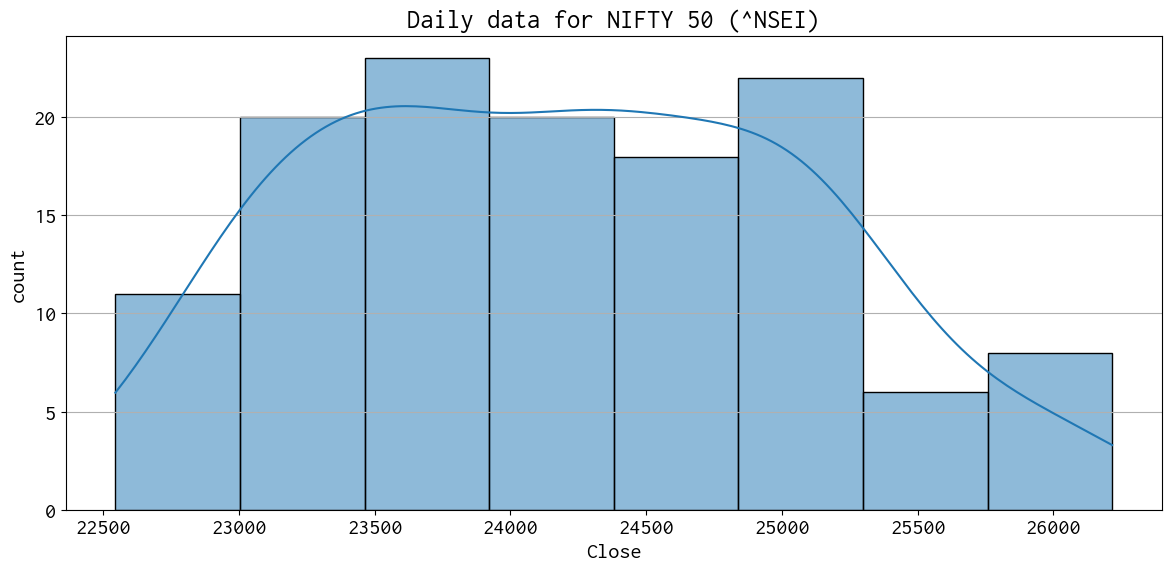

In [32]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_%s.png' % code)
plt.show()

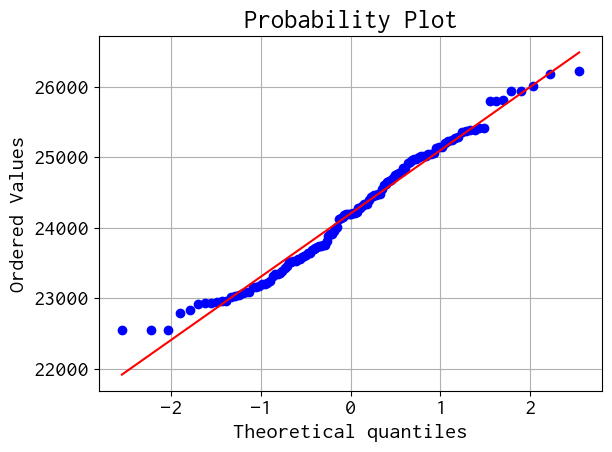

In [33]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_%s.png' % code)
plt.show()

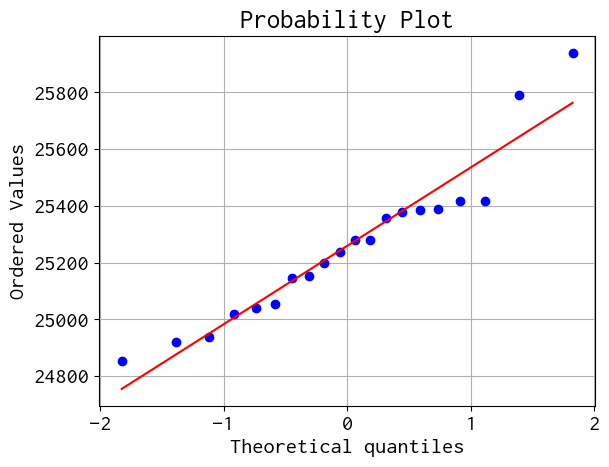

In [34]:
# Q-Qプロットの描画
stats.probplot(df.iloc[0:20]['Close'], dist="norm", plot=plt)

plt.grid()
plt.show()

In [17]:
len(df)

125

In [18]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.945, p-value: 0.000


In [19]:
stat, pval = stats.shapiro(df.iloc[0:20]['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.951, p-value: 0.387


In [20]:
res = stats.anderson(df['Close'])

In [21]:
print('%.3f' % res.statistic)

2.236


In [22]:
print(res.critical_values)

[0.559 0.637 0.764 0.891 1.06 ]


In [23]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]


In [24]:
res = stats.anderson(df.iloc[0:20]['Close'])

In [25]:
print('%.3f' % res.statistic)

0.313


In [26]:
print(res.critical_values)

[0.506 0.577 0.692 0.807 0.96 ]


In [27]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
